<a href="https://colab.research.google.com/github/bhaddbaeby/Data-Mining-Course/blob/main/Tugas_1_Utari_W_Ardhana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   **Nama : Utari W Ardhana**
*   **Kelas C 2021**

*   **NIM : 2109116103**
*   **Tugas 1 Data Mining**

#Analyze

Analisis asosiasi atau association rule mining adalah teknik data mining untuk menemukan aturan assosiatif antara suatu kombinasi item (Mengetahui hubungan antara satu atribut dengan yang lainnya). Contoh aturan assosiatif dari analisa pembelian di suatu pasar swalayan contohnya adalah dapat diketahuinya berapa besar kemungkinan seorang pelanggan membeli roti bersamaan dengan susu. Dengan pengetahuan tersebut pemilik pasar swalayan dapat mengatur penempatan barangnya atau merancang kampanye pemasaran dengan memakai kupon diskon untuk kombinasi barang tertentu.

Terdapat tahapan dalam analisis, yaitu:

Data Selection

Data Pre-processing

Data Mining

Interpretation/evaluation

#Data Selection

 Data selection merupakan data yang relevan dengan tugas analisis.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5976 sha256=96437cc2a29067f04648e192f31096919175b8e032a4a43bf8d40dc3a9990c5e
  Stored in directory: /root/.cache/pip/wheels/32/2a/54/10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [7]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime

In [9]:
# Import dataset
df = pd.read_excel('/content/drive/MyDrive/datmin/data_retail2.xlsx')

In [10]:
df

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536369,2020-12-01 08:35:00,35,BALIKPAPAN,A2546,711844120150,21756,ABC AYAM GRENG 340ML,SABUN & SAMPHOO,3,...,13047.0,ALTON,SEPINGGAN,Balikpapan,Kalimantan Timur,INDONESIA,32,Toko Kelontong,300106,CV. ANUGRAH DEZA MANDIRI
1,536380,2020-12-01 09:41:00,35,BALIKPAPAN,A2407,711844162426,22961,ABC SARI ASAM 250ML,MINUMAN,24,...,17809.0,TK 79,BDS II,BALIKPAPAN,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,300106,CV. ANUGRAH DEZA MANDIRI
2,536381,2020-12-01 09:41:00,35,BALIKPAPAN,A2611,711844140219,22139,ABC SAUS ASAM MANIS 195ML,SUSU,23,...,15311.0,TK DZAKI,KM 50,KUTAI KARTANEGARA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,300106,CV. ANUGRAH DEZA MANDIRI
3,536384,2020-12-01 09:53:00,35,BALIKPAPAN,A2482,8993478101053,84755,ACTIFED SYRUP 60ML COUGH SUPPRESSAN,MINUMAN,48,...,18074.0,TK CAHAYA UJUNG PANDANG,SENIPAH,Balikpapan,Kalimantan Timur,INDONESIA,32,Toko Kelontong,300106,CV. ANUGRAH DEZA MANDIRI
4,536390,2020-12-01 10:19:00,35,BALIKPAPAN,A1610,8992705042022,22961,AGAR SATELIT SUPER GREEN,MANISAN,12,...,17511.0,KOPERASI RS HERMINA,JL MT HARIYONO,Balikpapan,Kalimantan Timur,INDONESIA,45,Koperasi,300106,CV. ANUGRAH DEZA MANDIRI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,560997,2021-07-22 13:59:00,19,YOGYAKARTA,P0021,8993162116103,23298,P/P SYRUP 630ML MANGO,SYRUP,3,...,12627.0,SAROJA TOKO,NEPAK BULUREJO URUTAN MBAK WIWIN JLN.,MAGELANG,JAWA TENGAH,INDONESIA,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI
541905,560997,2021-07-22 13:59:00,19,YOGYAKARTA,P0021,8993162116103,22325,P/P SYRUP 630ML MANGO,SYRUP,3,...,12627.0,SMK NEGERI 1 KOPERASI,CAWANG MAGELANG JLN.,MAGELANG,JAWA TENGAH,INDONESIA,39,Kantin,190105,PT. KTRI DISTRIBUSI
541906,560997,2021-07-22 13:59:00,19,YOGYAKARTA,P0018,8993162116097,22320,P/P SYRUP 630ML COCOPANDAN,MINUMAN,3,...,12627.0,KOPI JANJI JIWA,"JL TENTARA PELAJAR BO 59A, KEMIRIREJO MAGELANG...",MAGELANG,JAWA TENGAH,INDONESIA,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI
541907,560997,2021-07-22 13:59:00,19,YOGYAKARTA,O0829,8991002312135,22962,OATBITS VITAFRUIT 121GR,OBATAN,12,...,12627.0,SURURI TOKO,JL. LANGGAR AGUNG BETENG SEBELAH MTS JLN.,MAGELANG,JAWA TENGAH,INDONESIA,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI


In [11]:
# Lihat tipe data
df.dtypes

InvoiceNo                      object
InvoiceDate            datetime64[ns]
BRANCH_SPLR                     int64
BRANCHNAME_SPLR                object
warehouseProductsID            object
BARCODEID                       int64
StockCode                      object
PRODUCT                        object
PRODUCT_CATEGORY               object
Quantity                        int64
UnitPrice                     float64
UnitPriceRupiah               float64
oldCUSTID                      object
CustomerID                    float64
CUSTNAME                       object
ADDRESS                        object
KOTA                           object
PROVINSI                       object
NEGARA                         object
CHANNELID_SPLR                  int64
CHANNELNAME_SPLR               object
SUBDISTID                       int64
SUBDIST_NAME                   object
dtype: object

In [12]:
# Describe data
df.describe()

,BRANCH_SPLR,BARCODEID,Quantity,UnitPrice,UnitPriceRupiah,CustomerID,CHANNELID_SPLR,SUBDISTID
count,541909.000000,5.419090e+05,541909.000000,541909.000000,5.419090e+05,406829.000000,541909.000000,541909.000000
mean,25.762779,8.144577e+12,9.552250,4.611114,6.593892e+04,15287.690570,36.072115,261119.832586
std,12.696276,5.977482e+12,218.081158,96.759853,1.383666e+06,1713.600303,9.862746,129491.622938
min,1.000000,1.000000e+00,-80995.000000,-11062.060000,-1.581875e+08,12346.000000,14.000000,10209.000000
25%,14.000000,8.888036e+12,1.000000,1.250000,1.787500e+04,13953.000000,32.000000,140223.000000
50%,28.000000,8.992920e+12,3.000000,2.080000,2.974400e+04,15152.000000,32.000000,280305.000000
75%,36.000000,8.998103e+12,10.000000,4.130000,5.905900e+04,16791.000000,41.000000,380109.000000
max,45.000000,8.999999e+14,80995.000000,38970.000000,5.572710e+08,18287.000000,93.000000,450202.000000


In [13]:
# Menampilkan kolom BRANCHNAME_SPLR
pd.unique(df.BRANCHNAME_SPLR)

array(['BALIKPAPAN', 'BANDAR LAMPUNG', 'BANDUNG', 'BANJARMASIN', 'BATAM',
       'BOGOR', 'CIREBON', 'DENPASAR', 'JAMBI', 'JEMBER', 'KEDIRI',
       'KUDUS', 'MAKASSAR', 'MALANG', 'MANADO', 'MATARAM', 'MEDAN',
       'PADANG', 'PALEMBANG', 'PALU', 'PANGKALPINANG', 'PEKANBARU',
       'PONTIANAK', 'PURWOKERTO', 'SAMARINDA', 'SEMARANG', 'SOLO',
       'SUKABUMI', 'SURABAYA 1', 'SURABAYA 2', 'TANGERANG', 'TASIKMALAYA',
       'TEGAL', 'YOGYAKARTA'], dtype=object)

In [14]:
# Menampilkan kolom BRANCHNAME_SPLR dengan kategori 'Palembang'
df2 = df[df["BRANCHNAME_SPLR"]=="BATAM"]

In [15]:
dfu = pd.DataFrame(df2)

In [16]:
dfu

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
65572,536388,2020-12-01 09:59:00,37,BATAM,A0011,8992855888884,22464,AGAR DOUBLE SWALL SUN GREEN,MANISAN,12,...,16250.0,TOP 100 SEJATI .PT ( KDA ),RUKO TUNAS BIZ PARK DEPAN PINTU MASUK KDA,BATAM,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330109,PT. SERDADU MAKMUR PERTAMA
65573,536395,2020-12-01 10:47:00,37,BATAM,A1978,9556852680507,22727,AIKO CUBIZ PASTRY 120G PEANUT,BISKUIT,8,...,13767.0,SUKAJADI MM,KOMP. RUKO SUKAJADI BLOK E NO.18,BATAM,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330109,PT. SERDADU MAKMUR PERTAMA
65574,536396,2020-12-01 10:51:00,37,BATAM,A1734,8999918451207,71053,AIM BISC 120G TRIF-TI,BISKUIT,6,...,17850.0,MARBELLA MART,RUKO MARBELLA BLOCK A3 NO.1-2,BATAM,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330109,PT. SERDADU MAKMUR PERTAMA
65575,536396,2020-12-01 10:51:00,37,BATAM,A1792,8999918451078,37370,AIM BISC 180G PACK ASSORTED,BISKUIT,6,...,17850.0,KANTIN PRIMKOPKAR KODIM 0316 BATAM,KODIM SERAYA ATAS,BATAM,KEPULAUAN RIAU,INDONESIA,39,Kantin,330109,PT. SERDADU MAKMUR PERTAMA
65576,536398,2020-12-01 10:52:00,37,BATAM,A0346,8999918181982,22866,AIM CREAM CRACKERS 250G,BISKUIT,12,...,13448.0,PASAR MINI MARKET KHARIL ANWAR,KELURAHAN KABIL TELUK BAKAU RT 05 RW 01,BATAM,KEPULAUAN RIAU,INDONESIA,33,Toko P&D,330109,PT. SERDADU MAKMUR PERTAMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83967,572858,2021-10-26 12:36:00,37,BATAM,P0061,8992832568808,21169,PALL MALL NOSTALGIA 200ML,PARFUM,2,...,13571.0,PASARLOKA,RUKO NAGOYA INDAH BLOK C2/5 (SBRNG HOTEL UTAMA...,BATAM,KEPULAUAN RIAU,INDONESIA,33,Toko P&D,330109,PT. SERDADU MAKMUR PERTAMA
83968,572858,2021-10-26 12:36:00,37,BATAM,P0059,8992832587052,85152,PALL MALL EDT 100ML JEALOUSLY,PARFUM,2,...,13571.0,H.W,KIJANG,NaN,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330110,PT. MULTISARI KINARA RETTRI
83969,572859,2021-10-26 12:39:00,37,BATAM,P0057,8993300103804,22220,PALEM SABUN JERUK 20S (BIRU),DETERGEN,1,...,16418.0,UNITY MART,GANET,TANJUNGPINANG,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330110,PT. MULTISARI KINARA RETTRI
83970,572859,2021-10-26 12:39:00,37,BATAM,P0047,8993099996472,23502,PAGODA SALEP 10G,OBATAN,1,...,16418.0,ASUN FAMILY,SIMPANG LAGOI,LAGOI,KEPULAUAN RIAU,INDONESIA,32,Toko Kelontong,330110,PT. MULTISARI KINARA RETTRI


In [18]:
# Lihat tipe data
dfu.dtypes

InvoiceNo                      object
InvoiceDate            datetime64[ns]
BRANCH_SPLR                     int64
BRANCHNAME_SPLR                object
warehouseProductsID            object
BARCODEID                       int64
StockCode                      object
PRODUCT                        object
PRODUCT_CATEGORY               object
Quantity                        int64
UnitPrice                     float64
UnitPriceRupiah               float64
oldCUSTID                      object
CustomerID                    float64
CUSTNAME                       object
ADDRESS                        object
KOTA                           object
PROVINSI                       object
NEGARA                         object
CHANNELID_SPLR                  int64
CHANNELNAME_SPLR               object
SUBDISTID                       int64
SUBDIST_NAME                   object
dtype: object

In [19]:
# Menampilkan info dataset (df.info())
dfu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18400 entries, 65572 to 83971
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   InvoiceNo            18400 non-null  object        
 1   InvoiceDate          18400 non-null  datetime64[ns]
 2   BRANCH_SPLR          18400 non-null  int64         
 3   BRANCHNAME_SPLR      18400 non-null  object        
 4   warehouseProductsID  18400 non-null  object        
 5   BARCODEID            18400 non-null  int64         
 6   StockCode            18400 non-null  object        
 7   PRODUCT              18400 non-null  object        
 8   PRODUCT_CATEGORY     18400 non-null  object        
 9   Quantity             18400 non-null  int64         
 10  UnitPrice            18400 non-null  float64       
 11  UnitPriceRupiah      18400 non-null  float64       
 12  oldCUSTID            18400 non-null  object        
 13  CustomerID           14213 

In [20]:
# Describe data
dfu.describe()

,BRANCH_SPLR,BARCODEID,Quantity,UnitPrice,UnitPriceRupiah,CustomerID,CHANNELID_SPLR,SUBDISTID
count,18400.0,1.840000e+04,18400.000000,18400.000000,1.840000e+04,14213.000000,18400.000000,18400.000000
mean,37.0,8.195788e+12,10.016957,4.720803,6.750749e+04,15436.369591,43.034348,330109.178696
std,0.0,2.362699e+12,45.829407,58.779717,8.405499e+05,1635.009401,15.764729,0.383108
min,37.0,2.000000e+00,-840.000000,0.000000,0.000000e+00,12347.000000,14.000000,330109.000000
25%,37.0,8.888167e+12,1.000000,1.250000,1.787500e+04,14096.000000,33.000000,330109.000000
50%,37.0,8.992942e+12,3.000000,2.100000,3.003000e+04,15436.000000,41.000000,330109.000000
75%,37.0,8.998667e+12,10.000000,4.130000,5.905900e+04,16813.000000,42.000000,330109.000000
max,37.0,5.025232e+13,3906.000000,5575.280000,7.972650e+07,18272.000000,75.000000,330110.000000


In [21]:
dfu.nunique()

InvoiceNo              1738
InvoiceDate            1643
BRANCH_SPLR               1
BRANCHNAME_SPLR           1
warehouseProductsID    2206
BARCODEID              2206
StockCode              2718
PRODUCT                2206
PRODUCT_CATEGORY         49
Quantity                150
UnitPrice               337
UnitPriceRupiah         337
oldCUSTID               869
CustomerID              970
CUSTNAME                861
ADDRESS                 812
KOTA                     23
PROVINSI                  1
NEGARA                    1
CHANNELID_SPLR           12
CHANNELNAME_SPLR         12
SUBDISTID                 2
SUBDIST_NAME              2
dtype: int64

In [22]:
# Menampilkan data 5 baris pertama
dfu.head()

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
65572,536388,2020-12-01 09:59:00,37,BATAM,A0011,8992855888884,22464,AGAR DOUBLE SWALL SUN GREEN,MANISAN,12,...,16250.0,TOP 100 SEJATI .PT ( KDA ),RUKO TUNAS BIZ PARK DEPAN PINTU MASUK KDA,BATAM,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330109,PT. SERDADU MAKMUR PERTAMA
65573,536395,2020-12-01 10:47:00,37,BATAM,A1978,9556852680507,22727,AIKO CUBIZ PASTRY 120G PEANUT,BISKUIT,8,...,13767.0,SUKAJADI MM,KOMP. RUKO SUKAJADI BLOK E NO.18,BATAM,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330109,PT. SERDADU MAKMUR PERTAMA
65574,536396,2020-12-01 10:51:00,37,BATAM,A1734,8999918451207,71053,AIM BISC 120G TRIF-TI,BISKUIT,6,...,17850.0,MARBELLA MART,RUKO MARBELLA BLOCK A3 NO.1-2,BATAM,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330109,PT. SERDADU MAKMUR PERTAMA
65575,536396,2020-12-01 10:51:00,37,BATAM,A1792,8999918451078,37370,AIM BISC 180G PACK ASSORTED,BISKUIT,6,...,17850.0,KANTIN PRIMKOPKAR KODIM 0316 BATAM,KODIM SERAYA ATAS,BATAM,KEPULAUAN RIAU,INDONESIA,39,Kantin,330109,PT. SERDADU MAKMUR PERTAMA
65576,536398,2020-12-01 10:52:00,37,BATAM,A0346,8999918181982,22866,AIM CREAM CRACKERS 250G,BISKUIT,12,...,13448.0,PASAR MINI MARKET KHARIL ANWAR,KELURAHAN KABIL TELUK BAKAU RT 05 RW 01,BATAM,KEPULAUAN RIAU,INDONESIA,33,Toko P&D,330109,PT. SERDADU MAKMUR PERTAMA


In [23]:
# Menampilkan nilai rata-rata, min, max, dan standar deviasi untuk kolom Age
dfu.agg({"Quantity": ["mean", "min", "max", "std"]})

,Quantity
mean,10.016957
min,-840.000000
max,3906.000000
std,45.829407


In [24]:
dfu.shape

(18400, 23)

#Data Pre-processing

Data Pre-processing adalah penghapusan data sebelum digunakan untuk memastikan atau meningkatkan kinerja, dan merupakan langkah penting dalam proses penambangan data

In [25]:
dfu.head(3)

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
65572,536388,2020-12-01 09:59:00,37,BATAM,A0011,8992855888884,22464,AGAR DOUBLE SWALL SUN GREEN,MANISAN,12,...,16250.0,TOP 100 SEJATI .PT ( KDA ),RUKO TUNAS BIZ PARK DEPAN PINTU MASUK KDA,BATAM,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330109,PT. SERDADU MAKMUR PERTAMA
65573,536395,2020-12-01 10:47:00,37,BATAM,A1978,9556852680507,22727,AIKO CUBIZ PASTRY 120G PEANUT,BISKUIT,8,...,13767.0,SUKAJADI MM,KOMP. RUKO SUKAJADI BLOK E NO.18,BATAM,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330109,PT. SERDADU MAKMUR PERTAMA
65574,536396,2020-12-01 10:51:00,37,BATAM,A1734,8999918451207,71053,AIM BISC 120G TRIF-TI,BISKUIT,6,...,17850.0,MARBELLA MART,RUKO MARBELLA BLOCK A3 NO.1-2,BATAM,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330109,PT. SERDADU MAKMUR PERTAMA


In [26]:
# Mengganti kolom PERIODE menjadi tipe data datetime
df['InvoiceDate'] = pd.to_datetime(dfu['InvoiceDate'])

In [27]:
# Clean up spaces in product description, product category and remove any rows that don't have a valid invoice
dfu['PRODUCT'] = dfu['PRODUCT'].str.strip()
dfu['PRODUCT_CATEGORY'] = dfu['PRODUCT_CATEGORY'].str.strip()

dfu.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

In [31]:
# menghapus variabel inoviceNO yang diawali dengan huruf C pada invoice numbernya
dfu['InvoiceNo'] = dfu['InvoiceNo'].astype('str')
dfu = dfu[~(dfu['InvoiceNo'].str[0] == 'C')]

#Data Transformarion

Data Transformation adalah proses konversi dari data sumber ke data tujuan

In [32]:
dfu

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
65572,536388,2020-12-01 09:59:00,37,BATAM,A0011,8992855888884,22464,AGAR DOUBLE SWALL SUN GREEN,MANISAN,12,...,16250.0,TOP 100 SEJATI .PT ( KDA ),RUKO TUNAS BIZ PARK DEPAN PINTU MASUK KDA,BATAM,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330109,PT. SERDADU MAKMUR PERTAMA
65573,536395,2020-12-01 10:47:00,37,BATAM,A1978,9556852680507,22727,AIKO CUBIZ PASTRY 120G PEANUT,BISKUIT,8,...,13767.0,SUKAJADI MM,KOMP. RUKO SUKAJADI BLOK E NO.18,BATAM,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330109,PT. SERDADU MAKMUR PERTAMA
65574,536396,2020-12-01 10:51:00,37,BATAM,A1734,8999918451207,71053,AIM BISC 120G TRIF-TI,BISKUIT,6,...,17850.0,MARBELLA MART,RUKO MARBELLA BLOCK A3 NO.1-2,BATAM,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330109,PT. SERDADU MAKMUR PERTAMA
65575,536396,2020-12-01 10:51:00,37,BATAM,A1792,8999918451078,37370,AIM BISC 180G PACK ASSORTED,BISKUIT,6,...,17850.0,KANTIN PRIMKOPKAR KODIM 0316 BATAM,KODIM SERAYA ATAS,BATAM,KEPULAUAN RIAU,INDONESIA,39,Kantin,330109,PT. SERDADU MAKMUR PERTAMA
65576,536398,2020-12-01 10:52:00,37,BATAM,A0346,8999918181982,22866,AIM CREAM CRACKERS 250G,BISKUIT,12,...,13448.0,PASAR MINI MARKET KHARIL ANWAR,KELURAHAN KABIL TELUK BAKAU RT 05 RW 01,BATAM,KEPULAUAN RIAU,INDONESIA,33,Toko P&D,330109,PT. SERDADU MAKMUR PERTAMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83967,572858,2021-10-26 12:36:00,37,BATAM,P0061,8992832568808,21169,PALL MALL NOSTALGIA 200ML,PARFUM,2,...,13571.0,PASARLOKA,RUKO NAGOYA INDAH BLOK C2/5 (SBRNG HOTEL UTAMA...,BATAM,KEPULAUAN RIAU,INDONESIA,33,Toko P&D,330109,PT. SERDADU MAKMUR PERTAMA
83968,572858,2021-10-26 12:36:00,37,BATAM,P0059,8992832587052,85152,PALL MALL EDT 100ML JEALOUSLY,PARFUM,2,...,13571.0,H.W,KIJANG,NaN,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330110,PT. MULTISARI KINARA RETTRI
83969,572859,2021-10-26 12:39:00,37,BATAM,P0057,8993300103804,22220,PALEM SABUN JERUK 20S (BIRU),DETERGEN,1,...,16418.0,UNITY MART,GANET,TANJUNGPINANG,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330110,PT. MULTISARI KINARA RETTRI
83970,572859,2021-10-26 12:39:00,37,BATAM,P0047,8993099996472,23502,PAGODA SALEP 10G,OBATAN,1,...,16418.0,ASUN FAMILY,SIMPANG LAGOI,LAGOI,KEPULAUAN RIAU,INDONESIA,32,Toko Kelontong,330110,PT. MULTISARI KINARA RETTRI


In [33]:
dataSet = (df[df['PROVINSI'] =="KEPULAUAN RIAU"].groupby(['InvoiceNo', 'PRODUCT_CATEGORY'])['Quantity'].count()\
                                      .unstack().reset_index().fillna(0)\
                                      .set_index('InvoiceNo'))
dataSet.head()

PRODUCT_CATEGORY,KACANG TANAH,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536395,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536396,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536398,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Show a subset of columns
dataSet.iloc[:,[0,1,2,3,4,5,6,7]].head()

PRODUCT_CATEGORY,KACANG TANAH,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT
InvoiceNo,,,,,,,,
536388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536395,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
536396,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
536398,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
536401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Melakukan proses encoding -> Mengubah data kebentuk angka, agar sistem atau komputer dapat memahami informasi dari dataset
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

dataSet_sets = dataSet.applymap(encode_units)
dataSet_sets.head(5)

PRODUCT_CATEGORY,KACANG TANAH,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536395,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536396,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536398,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Data Mining

Data mining adalah Penggalian data adalah ekstraksi pola yang menarik dari data dalam jumlah besar.

In [36]:
dataSet_sets

PRODUCT_CATEGORY,KACANG TANAH,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536395,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536396,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536398,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C572754,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
C572761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C572831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
dfz = dataSet_sets
dfz

PRODUCT_CATEGORY,KACANG TANAH,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536395,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536396,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536398,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C572754,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
C572761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C572831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# 1 Item set buat nampilkan berapa set tiap item
dfz.sum()

PRODUCT_CATEGORY
 KACANG TANAH          8
ALAT LISTRIK          57
ALAT RUMAH TANGGA    444
BEER                  48
BERAS                 55
BISKUIT              458
BUMBU                249
COKELAT              199
DETERGEN             358
DIET FOOD             49
ELEKTRONIK           107
ES                    72
GULAPUTIH             31
KAPAS                 64
KECAP & SAUCE        148
KONSINYASI             8
KOSMETIK             530
LAIN-LAIN             72
MAKANAN              112
MAKANAN BAYI          87
MAKANAN KALENG       102
MAKANAN PAGI          63
MANISAN              121
MENTEGA                8
MIE                  156
MINUMAN              440
MINYAK GORENG         72
MINYAK RAMBUT         99
OBATAN               336
PAKAIAN               55
PAMPERS              166
PARFUM               472
PASTA & S-GIGI       167
PECAH BELAH          110
PEMBALUT WANITA       96
PERMEN               282
PRODUCT BAYI         201
ROKOK                102
SABUN & SAMPHOO      504
SEMIR SE

In [39]:
# Menampilkan item
dfz.columns

Index([' KACANG TANAH', 'ALAT LISTRIK', 'ALAT RUMAH TANGGA', 'BEER', 'BERAS',
       'BISKUIT', 'BUMBU', 'COKELAT', 'DETERGEN', 'DIET FOOD', 'ELEKTRONIK',
       'ES', 'GULAPUTIH', 'KAPAS', 'KECAP & SAUCE', 'KONSINYASI', 'KOSMETIK',
       'LAIN-LAIN', 'MAKANAN', 'MAKANAN BAYI', 'MAKANAN KALENG',
       'MAKANAN PAGI', 'MANISAN', 'MENTEGA', 'MIE', 'MINUMAN', 'MINYAK GORENG',
       'MINYAK RAMBUT', 'OBATAN', 'PAKAIAN', 'PAMPERS', 'PARFUM',
       'PASTA & S-GIGI', 'PECAH BELAH', 'PEMBALUT WANITA', 'PERMEN',
       'PRODUCT BAYI', 'ROKOK', 'SABUN & SAMPHOO', 'SEMIR SEPATU', 'SLAI/JAM',
       'SNACK', 'STATIONERY', 'SUSU', 'SYRUP', 'TANDAS', 'TEH & KOPI',
       'TEPUNG', 'TISSUE'],
      dtype='object', name='PRODUCT_CATEGORY')

In [41]:
# 2 Item set = kombinasi 2 item
from itertools import permutations # library untuk membuat kombinasi barang

# Extract unique items.
asrule = list(permutations(dfz.columns, 2))
asrule

[(' KACANG TANAH', 'ALAT LISTRIK'),
 (' KACANG TANAH', 'ALAT RUMAH TANGGA'),
 (' KACANG TANAH', 'BEER'),
 (' KACANG TANAH', 'BERAS'),
 (' KACANG TANAH', 'BISKUIT'),
 (' KACANG TANAH', 'BUMBU'),
 (' KACANG TANAH', 'COKELAT'),
 (' KACANG TANAH', 'DETERGEN'),
 (' KACANG TANAH', 'DIET FOOD'),
 (' KACANG TANAH', 'ELEKTRONIK'),
 (' KACANG TANAH', 'ES'),
 (' KACANG TANAH', 'GULAPUTIH'),
 (' KACANG TANAH', 'KAPAS'),
 (' KACANG TANAH', 'KECAP & SAUCE'),
 (' KACANG TANAH', 'KONSINYASI'),
 (' KACANG TANAH', 'KOSMETIK'),
 (' KACANG TANAH', 'LAIN-LAIN'),
 (' KACANG TANAH', 'MAKANAN'),
 (' KACANG TANAH', 'MAKANAN BAYI'),
 (' KACANG TANAH', 'MAKANAN KALENG'),
 (' KACANG TANAH', 'MAKANAN PAGI'),
 (' KACANG TANAH', 'MANISAN'),
 (' KACANG TANAH', 'MENTEGA'),
 (' KACANG TANAH', 'MIE'),
 (' KACANG TANAH', 'MINUMAN'),
 (' KACANG TANAH', 'MINYAK GORENG'),
 (' KACANG TANAH', 'MINYAK RAMBUT'),
 (' KACANG TANAH', 'OBATAN'),
 (' KACANG TANAH', 'PAKAIAN'),
 (' KACANG TANAH', 'PAMPERS'),
 (' KACANG TANAH', 'PARFU

In [42]:
# Memfilter pada item kombinasi, kemudian hitung item yang muncul saja
asrule_new = []
for rule in asrule:
  # Memfilter dengan nama kolom
  if len(dfz[(dfz[rule[0]]==1) & (dfz[rule[1]]==1)]) >0:
    asrule_new.append(rule)
asrule_new

[(' KACANG TANAH', 'ALAT RUMAH TANGGA'),
 (' KACANG TANAH', 'BEER'),
 (' KACANG TANAH', 'BISKUIT'),
 (' KACANG TANAH', 'BUMBU'),
 (' KACANG TANAH', 'COKELAT'),
 (' KACANG TANAH', 'DETERGEN'),
 (' KACANG TANAH', 'ELEKTRONIK'),
 (' KACANG TANAH', 'GULAPUTIH'),
 (' KACANG TANAH', 'KAPAS'),
 (' KACANG TANAH', 'KECAP & SAUCE'),
 (' KACANG TANAH', 'KOSMETIK'),
 (' KACANG TANAH', 'MAKANAN BAYI'),
 (' KACANG TANAH', 'MAKANAN KALENG'),
 (' KACANG TANAH', 'MAKANAN PAGI'),
 (' KACANG TANAH', 'MANISAN'),
 (' KACANG TANAH', 'MIE'),
 (' KACANG TANAH', 'MINUMAN'),
 (' KACANG TANAH', 'MINYAK GORENG'),
 (' KACANG TANAH', 'MINYAK RAMBUT'),
 (' KACANG TANAH', 'OBATAN'),
 (' KACANG TANAH', 'PAKAIAN'),
 (' KACANG TANAH', 'PAMPERS'),
 (' KACANG TANAH', 'PARFUM'),
 (' KACANG TANAH', 'PASTA & S-GIGI'),
 (' KACANG TANAH', 'PECAH BELAH'),
 (' KACANG TANAH', 'PEMBALUT WANITA'),
 (' KACANG TANAH', 'PERMEN'),
 (' KACANG TANAH', 'PRODUCT BAYI'),
 (' KACANG TANAH', 'ROKOK'),
 (' KACANG TANAH', 'SABUN & SAMPHOO'),
 (

In [44]:
cal = {} # Mengganti dictionary
for rule in asrule_new:
  jumlah_dat= len(dfz[
      (dfz[rule[0]]==1) & (dfz[rule[1]]==1)
      ])
  cal[str(rule)] = jumlah_dat

cal

{"(' KACANG TANAH', 'ALAT RUMAH TANGGA')": 5,
 "(' KACANG TANAH', 'BEER')": 6,
 "(' KACANG TANAH', 'BISKUIT')": 6,
 "(' KACANG TANAH', 'BUMBU')": 5,
 "(' KACANG TANAH', 'COKELAT')": 1,
 "(' KACANG TANAH', 'DETERGEN')": 3,
 "(' KACANG TANAH', 'ELEKTRONIK')": 3,
 "(' KACANG TANAH', 'GULAPUTIH')": 1,
 "(' KACANG TANAH', 'KAPAS')": 5,
 "(' KACANG TANAH', 'KECAP & SAUCE')": 1,
 "(' KACANG TANAH', 'KOSMETIK')": 6,
 "(' KACANG TANAH', 'MAKANAN BAYI')": 2,
 "(' KACANG TANAH', 'MAKANAN KALENG')": 1,
 "(' KACANG TANAH', 'MAKANAN PAGI')": 7,
 "(' KACANG TANAH', 'MANISAN')": 2,
 "(' KACANG TANAH', 'MIE')": 3,
 "(' KACANG TANAH', 'MINUMAN')": 6,
 "(' KACANG TANAH', 'MINYAK GORENG')": 1,
 "(' KACANG TANAH', 'MINYAK RAMBUT')": 1,
 "(' KACANG TANAH', 'OBATAN')": 7,
 "(' KACANG TANAH', 'PAKAIAN')": 1,
 "(' KACANG TANAH', 'PAMPERS')": 6,
 "(' KACANG TANAH', 'PARFUM')": 5,
 "(' KACANG TANAH', 'PASTA & S-GIGI')": 2,
 "(' KACANG TANAH', 'PECAH BELAH')": 4,
 "(' KACANG TANAH', 'PEMBALUT WANITA')": 1,
 "(' K

In [45]:
# untuk melihat banyak transaksi
len(dfz)

1738

In [47]:
# List support
# supp = [i/len(dfm)*100 for i in hitung.values()]
# print(supp)


print("---")
for item,ab in cal.items():
  print(f"{item} support = {ab/len(dfz)*100}%")

---
(' KACANG TANAH', 'ALAT RUMAH TANGGA') support = 0.28768699654775604%
(' KACANG TANAH', 'BEER') support = 0.34522439585730724%
(' KACANG TANAH', 'BISKUIT') support = 0.34522439585730724%
(' KACANG TANAH', 'BUMBU') support = 0.28768699654775604%
(' KACANG TANAH', 'COKELAT') support = 0.05753739930955121%
(' KACANG TANAH', 'DETERGEN') support = 0.17261219792865362%
(' KACANG TANAH', 'ELEKTRONIK') support = 0.17261219792865362%
(' KACANG TANAH', 'GULAPUTIH') support = 0.05753739930955121%
(' KACANG TANAH', 'KAPAS') support = 0.28768699654775604%
(' KACANG TANAH', 'KECAP & SAUCE') support = 0.05753739930955121%
(' KACANG TANAH', 'KOSMETIK') support = 0.34522439585730724%
(' KACANG TANAH', 'MAKANAN BAYI') support = 0.11507479861910241%
(' KACANG TANAH', 'MAKANAN KALENG') support = 0.05753739930955121%
(' KACANG TANAH', 'MAKANAN PAGI') support = 0.4027617951668585%
(' KACANG TANAH', 'MANISAN') support = 0.11507479861910241%
(' KACANG TANAH', 'MIE') support = 0.17261219792865362%
(' KACAN

In [50]:
# untuk melihat banyak transaksi
dfz["SNACK"].sum()

292

In [51]:
# List Confidence
# print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("---")
for item,ab in cal.items():
  #"A->B"
  i = eval(item) # Mengubah string ke list
  print(f"{i[0]}->{i[1]}  Confidence = {ab/dfz[i[0]].sum()*100}%")

---
 KACANG TANAH->ALAT RUMAH TANGGA  Confidence = 62.5%
 KACANG TANAH->BEER  Confidence = 75.0%
 KACANG TANAH->BISKUIT  Confidence = 75.0%
 KACANG TANAH->BUMBU  Confidence = 62.5%
 KACANG TANAH->COKELAT  Confidence = 12.5%
 KACANG TANAH->DETERGEN  Confidence = 37.5%
 KACANG TANAH->ELEKTRONIK  Confidence = 37.5%
 KACANG TANAH->GULAPUTIH  Confidence = 12.5%
 KACANG TANAH->KAPAS  Confidence = 62.5%
 KACANG TANAH->KECAP & SAUCE  Confidence = 12.5%
 KACANG TANAH->KOSMETIK  Confidence = 75.0%
 KACANG TANAH->MAKANAN BAYI  Confidence = 25.0%
 KACANG TANAH->MAKANAN KALENG  Confidence = 12.5%
 KACANG TANAH->MAKANAN PAGI  Confidence = 87.5%
 KACANG TANAH->MANISAN  Confidence = 25.0%
 KACANG TANAH->MIE  Confidence = 37.5%
 KACANG TANAH->MINUMAN  Confidence = 75.0%
 KACANG TANAH->MINYAK GORENG  Confidence = 12.5%
 KACANG TANAH->MINYAK RAMBUT  Confidence = 12.5%
 KACANG TANAH->OBATAN  Confidence = 87.5%
 KACANG TANAH->PAKAIAN  Confidence = 12.5%
 KACANG TANAH->PAMPERS  Confidence = 75.0%
 KACANG TA

In [52]:
# Build up the frequent items, the rules, and model
# Perintah yang di gunakan adalah apriori, dengan data dari basket_sets dengan minimum nilai support 0.1/ 10%.
frequent_itemsets = apriori(dataSet_sets, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.255466,(ALAT RUMAH TANGGA)
1,0.263521,(BISKUIT)
2,0.143268,(BUMBU)
3,0.114499,(COKELAT)
4,0.205984,(DETERGEN)
...,...,...
59,0.101841,"(SABUN & SAMPHOO, MINUMAN, BISKUIT)"
60,0.106444,"(SABUN & SAMPHOO, PARFUM, BISKUIT)"
61,0.107595,"(KOSMETIK, MINUMAN, SABUN & SAMPHOO)"
62,0.113349,"(KOSMETIK, PARFUM, SABUN & SAMPHOO)"


In [53]:
asrule1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
asrule1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALAT RUMAH TANGGA),(BISKUIT),0.255466,0.263521,0.132911,0.520270,1.974301,0.065591,1.535195
1,(BISKUIT),(ALAT RUMAH TANGGA),0.263521,0.255466,0.132911,0.504367,1.974301,0.065591,1.502187
2,(DETERGEN),(ALAT RUMAH TANGGA),0.205984,0.255466,0.104718,0.508380,1.990010,0.052096,1.514450
3,(ALAT RUMAH TANGGA),(DETERGEN),0.255466,0.205984,0.104718,0.409910,1.990010,0.052096,1.345585
4,(KOSMETIK),(ALAT RUMAH TANGGA),0.304948,0.255466,0.129459,0.424528,1.661780,0.051555,1.293780


In [54]:
hasil1 = asrule1[(asrule1['lift'] >= 1) & 
               (asrule1['confidence'] >= 0.3)]

apr_result = hasil1.sort_values(by='confidence', ascending=False)
apr_result.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
106,"(BISKUIT, SABUN & SAMPHOO)",(KOSMETIK),0.141542,0.304948,0.113349,0.800813,2.626062,0.070186,3.489444
110,"(MINUMAN, PARFUM)",(BISKUIT),0.128884,0.263521,0.102992,0.799107,3.032420,0.069028,3.666027
81,"(ALAT RUMAH TANGGA, BISKUIT)",(PARFUM),0.132911,0.271577,0.104718,0.787879,2.901130,0.068622,3.433996
80,"(ALAT RUMAH TANGGA, PARFUM)",(BISKUIT),0.133487,0.263521,0.104718,0.784483,2.976924,0.069541,3.417261
136,"(SABUN & SAMPHOO, PARFUM)",(KOSMETIK),0.145570,0.304948,0.113349,0.778656,2.553404,0.068957,3.140145
74,"(KOSMETIK, ALAT RUMAH TANGGA)",(BISKUIT),0.129459,0.263521,0.100690,0.777778,2.951480,0.066575,3.314154
140,"(MINUMAN, PARFUM)",(SABUN & SAMPHOO),0.128884,0.289988,0.100115,0.776786,2.678678,0.062740,3.180852
100,"(BISKUIT, PARFUM)",(KOSMETIK),0.147296,0.304948,0.113924,0.773438,2.536291,0.069006,3.067815
86,"(KOSMETIK, ALAT RUMAH TANGGA)",(PARFUM),0.129459,0.271577,0.100115,0.773333,2.847571,0.064957,3.213633
128,"(KOSMETIK, MINUMAN)",(SABUN & SAMPHOO),0.139816,0.289988,0.107595,0.769547,2.653717,0.067050,3.080943


In [55]:
#Lift Ratio adalah suatu ukuran (parameter) untuk mengetahui kekuatan aturan asosiasi (association rule) yang telah terbentuk dari nilai support
asrule2 = association_rules(frequent_itemsets, metric="lift", min_threshold=2)
asrule2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(OBATAN),(ALAT RUMAH TANGGA),0.193326,0.255466,0.110472,0.571429,2.236808,0.061084,1.737246
1,(ALAT RUMAH TANGGA),(OBATAN),0.255466,0.193326,0.110472,0.432432,2.236808,0.061084,1.421283
2,(MINUMAN),(BISKUIT),0.253165,0.263521,0.138090,0.545455,2.069869,0.071376,1.620253
3,(BISKUIT),(MINUMAN),0.263521,0.253165,0.138090,0.524017,2.069869,0.071376,1.569040
4,(OBATAN),(BISKUIT),0.193326,0.263521,0.112773,0.583333,2.213610,0.061828,1.767549


#Interpretation

In [57]:
# check barang kedua untuk kombinasi barang pertama

apr_result['consequents'].value_counts()

(BISKUIT)                        17
(KOSMETIK)                       16
(PARFUM)                         16
(SABUN & SAMPHOO)                14
(MINUMAN)                        13
(ALAT RUMAH TANGGA)              11
(DETERGEN)                        7
(OBATAN)                          7
(SUSU)                            6
(KOSMETIK, BISKUIT)               4
(BISKUIT, PARFUM)                 4
(KOSMETIK, SABUN & SAMPHOO)       3
(KOSMETIK, PARFUM)                3
(PARFUM, SABUN & SAMPHOO)         3
(BISKUIT, SABUN & SAMPHOO)        3
(MINUMAN, SABUN & SAMPHOO)        3
(MINUMAN, BISKUIT)                3
(ALAT RUMAH TANGGA, PARFUM)       2
(KOSMETIK, MINUMAN)               2
(MINUMAN, PARFUM)                 2
(ALAT RUMAH TANGGA, BISKUIT)      2
(KOSMETIK, ALAT RUMAH TANGGA)     2
(SNACK)                           2
(PERMEN)                          1
Name: consequents, dtype: int64

#Customer Life Time Value

In [58]:
# Import dataset
df = pd.read_excel('/content/drive/MyDrive/datmin/data_retail2.xlsx')

df.head()

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536369,2020-12-01 08:35:00,35,BALIKPAPAN,A2546,711844120150,21756,ABC AYAM GRENG 340ML,SABUN & SAMPHOO,3,...,13047.0,ALTON,SEPINGGAN,Balikpapan,Kalimantan Timur,INDONESIA,32,Toko Kelontong,300106,CV. ANUGRAH DEZA MANDIRI
1,536380,2020-12-01 09:41:00,35,BALIKPAPAN,A2407,711844162426,22961,ABC SARI ASAM 250ML,MINUMAN,24,...,17809.0,TK 79,BDS II,BALIKPAPAN,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,300106,CV. ANUGRAH DEZA MANDIRI
2,536381,2020-12-01 09:41:00,35,BALIKPAPAN,A2611,711844140219,22139,ABC SAUS ASAM MANIS 195ML,SUSU,23,...,15311.0,TK DZAKI,KM 50,KUTAI KARTANEGARA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,300106,CV. ANUGRAH DEZA MANDIRI
3,536384,2020-12-01 09:53:00,35,BALIKPAPAN,A2482,8993478101053,84755,ACTIFED SYRUP 60ML COUGH SUPPRESSAN,MINUMAN,48,...,18074.0,TK CAHAYA UJUNG PANDANG,SENIPAH,Balikpapan,Kalimantan Timur,INDONESIA,32,Toko Kelontong,300106,CV. ANUGRAH DEZA MANDIRI
4,536390,2020-12-01 10:19:00,35,BALIKPAPAN,A1610,8992705042022,22961,AGAR SATELIT SUPER GREEN,MANISAN,12,...,17511.0,KOPERASI RS HERMINA,JL MT HARIYONO,Balikpapan,Kalimantan Timur,INDONESIA,45,Koperasi,300106,CV. ANUGRAH DEZA MANDIRI


In [59]:
dfu = pd.DataFrame(df2)

In [60]:
dfu

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
65572,536388,2020-12-01 09:59:00,37,BATAM,A0011,8992855888884,22464,AGAR DOUBLE SWALL SUN GREEN,MANISAN,12,...,16250.0,TOP 100 SEJATI .PT ( KDA ),RUKO TUNAS BIZ PARK DEPAN PINTU MASUK KDA,BATAM,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330109,PT. SERDADU MAKMUR PERTAMA
65573,536395,2020-12-01 10:47:00,37,BATAM,A1978,9556852680507,22727,AIKO CUBIZ PASTRY 120G PEANUT,BISKUIT,8,...,13767.0,SUKAJADI MM,KOMP. RUKO SUKAJADI BLOK E NO.18,BATAM,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330109,PT. SERDADU MAKMUR PERTAMA
65574,536396,2020-12-01 10:51:00,37,BATAM,A1734,8999918451207,71053,AIM BISC 120G TRIF-TI,BISKUIT,6,...,17850.0,MARBELLA MART,RUKO MARBELLA BLOCK A3 NO.1-2,BATAM,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330109,PT. SERDADU MAKMUR PERTAMA
65575,536396,2020-12-01 10:51:00,37,BATAM,A1792,8999918451078,37370,AIM BISC 180G PACK ASSORTED,BISKUIT,6,...,17850.0,KANTIN PRIMKOPKAR KODIM 0316 BATAM,KODIM SERAYA ATAS,BATAM,KEPULAUAN RIAU,INDONESIA,39,Kantin,330109,PT. SERDADU MAKMUR PERTAMA
65576,536398,2020-12-01 10:52:00,37,BATAM,A0346,8999918181982,22866,AIM CREAM CRACKERS 250G,BISKUIT,12,...,13448.0,PASAR MINI MARKET KHARIL ANWAR,KELURAHAN KABIL TELUK BAKAU RT 05 RW 01,BATAM,KEPULAUAN RIAU,INDONESIA,33,Toko P&D,330109,PT. SERDADU MAKMUR PERTAMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83967,572858,2021-10-26 12:36:00,37,BATAM,P0061,8992832568808,21169,PALL MALL NOSTALGIA 200ML,PARFUM,2,...,13571.0,PASARLOKA,RUKO NAGOYA INDAH BLOK C2/5 (SBRNG HOTEL UTAMA...,BATAM,KEPULAUAN RIAU,INDONESIA,33,Toko P&D,330109,PT. SERDADU MAKMUR PERTAMA
83968,572858,2021-10-26 12:36:00,37,BATAM,P0059,8992832587052,85152,PALL MALL EDT 100ML JEALOUSLY,PARFUM,2,...,13571.0,H.W,KIJANG,NaN,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330110,PT. MULTISARI KINARA RETTRI
83969,572859,2021-10-26 12:39:00,37,BATAM,P0057,8993300103804,22220,PALEM SABUN JERUK 20S (BIRU),DETERGEN,1,...,16418.0,UNITY MART,GANET,TANJUNGPINANG,KEPULAUAN RIAU,INDONESIA,42,Mini Market,330110,PT. MULTISARI KINARA RETTRI
83970,572859,2021-10-26 12:39:00,37,BATAM,P0047,8993099996472,23502,PAGODA SALEP 10G,OBATAN,1,...,16418.0,ASUN FAMILY,SIMPANG LAGOI,LAGOI,KEPULAUAN RIAU,INDONESIA,32,Toko Kelontong,330110,PT. MULTISARI KINARA RETTRI


In [61]:
product_dfu = dfu.value_counts()
product_dfu = pd.DataFrame(product_dfu)
product_dfu

0
InvoiceNo InvoiceDate         BRANCH_SPLR BRANCHNAME_SPLR warehouseProductsID BARCODEID     StockCode PRODUCT                       PRODUCT_CATEGORY Quantity UnitPrice UnitPriceRupiah oldCUSTID CustomerID CUSTNAME                      ADDRESS                                            KOTA  PROVINSI       NEGARA    CHANNELID_SPLR CHANNELNAME_SPLR SUBDISTID SUBDIST_NAME                 
536388    2020-12-01 09:59:00 37          BATAM           A0011               8992855888884 22464     AGAR DOUBLE SWALL SUN GREEN   MANISAN           12      1.65      23595.0         3311583   16250.0    TOP 100 SEJATI .PT ( KDA )    RUKO TUNAS BIZ PARK  DEPAN PINTU MASUK KDA         BATAM KEPULAUAN RIAU INDONESIA 42             Mini Market      330109    PT. SERDADU MAKMUR PERTAMA  1
572323    2021-10-24 09:46:00 37          BATAM           S7522               8999099920462 22578     SGM 1ANANDA 400GR             SUSU              24      0.29      4147.0          3311709   14312.0    FAJAR TK                      MANGSANG PERMAI BLOK J NO 179                      BATAM KEPULAUAN RIAU INDONESIA 33             Toko P&D         330109    PT. SERDADU MAKMUR PERTAMA  1
                                                          S7316               8997004380929 21485     SAMBAL XU XING ACEH 350ML     SABUN & SAMPHOO   3       4.95      70785.0         3311364   14312.0    KOPERASI POLITEKNIK BATAM     0                                                  BATAM KEPULAUAN RIAU INDONESIA 45             Koperasi         330109    PT. SERDADU MAKMUR PERTAMA  1
                                                          S7335               8999099919619 23321     SGM 3 SOYA 400G               BUMBU             12      1.65      23595.0         3311305   14312.0    JODOH CENTRE .PT ( BENGKONG ) KOMP. JASA INDAH   BLOK A NO.4-10                  BATAM KEPULAUAN RIAU INDONESIA 42             Mini Market      330109    PT. SERDADU MAKMUR PERTAMA  1
                                                          S7336               8999999006563 22469     SELECTION FRUIT 750ML SALAD   DETERGEN          24      1.65      23595.0         3311347   14312.0    KATARI JAYA 2                 BLOCK E NO.71  BIDAYU                              BATAM KEPULAUAN RIAU INDONESIA 33             Toko P&D         330109    PT. SERDADU MAKMUR PERTAMA  1
...                                                                                                                                                                                                                                                                                                                                                                                               ..
553710    2021-05-18 15:35:00 37          BATAM           B4443               8997004060241 72807C    BIHUN JGNG PANEN 160G         MAKANAN           3       4.25      60775.0         3311148   17338.0    BPS NAGOYA                    NAGOYA DEPAN HOTEL UTAMA   (SAMPING WAKAKA)        BATAM KEPULAUAN RIAU INDONESIA 42             Mini Market      330109    PT. SERDADU MAKMUR PERTAMA  1
                                                          B4482               8990057782764 22745     BEBELAC 4 400G VANILA         SUSU              2       2.10      30030.0         3311991   17338.0    GROS MART ALIBABA             RUKO ALIBABA BLOCK A NO.1-3                        BATAM KEPULAUAN RIAU INDONESIA 33             Toko P&D         330109    PT. SERDADU MAKMUR PERTAMA  1
                                                          B4609               8990090100136 22749     BEDAK DWI GUNA KG             KOSMETIK          1       3.75      53625.0         3311113   17338.0    AWANG                         PURI AGUNG 3 BLOK A2 NO.18                         BATAM KEPULAUAN RIAU INDONESIA 33             Toko P&D         330109    PT. SERDADU MAKMUR PERTAMA  1
                                                          B4614               9555030103777 22348     BIG FO

In [62]:
dfu.shape

(18400, 23)

In [63]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18400 entries, 65572 to 83971
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   InvoiceNo            18400 non-null  object        
 1   InvoiceDate          18400 non-null  datetime64[ns]
 2   BRANCH_SPLR          18400 non-null  int64         
 3   BRANCHNAME_SPLR      18400 non-null  object        
 4   warehouseProductsID  18400 non-null  object        
 5   BARCODEID            18400 non-null  int64         
 6   StockCode            18400 non-null  object        
 7   PRODUCT              18400 non-null  object        
 8   PRODUCT_CATEGORY     18400 non-null  object        
 9   Quantity             18400 non-null  int64         
 10  UnitPrice            18400 non-null  float64       
 11  UnitPriceRupiah      18400 non-null  float64       
 12  oldCUSTID            18400 non-null  object        
 13  CustomerID           14213 

In [64]:
# Mengganti kolom PERIODE menjadi tipe data datetime
dfu['InvoiceDate'] = pd.to_datetime(dfu['InvoiceDate'])

In [65]:
# Melihat range/rentang waktu dari data yang digunakan
print('Date Range: %s to %s' % (dfu['InvoiceDate'].min(), dfu['InvoiceDate'].max()))

Date Range: 2020-12-01 09:59:00 to 2021-10-26 12:39:00


In [66]:
dfu['Sales']=dfu['Quantity']*dfu['UnitPriceRupiah']

In [67]:
dfu['Sales']

65572    283140.0
65573    429000.0
65574    290862.0
65575     90948.0
65576    360360.0
           ...   
83967     48334.0
83968     60060.0
83969    142285.0
83970     17875.0
83971     17875.0
Name: Sales, Length: 18400, dtype: float64

In [68]:
# Mendapat order summary dataset yang menunjukkan total penjualan yang dilakukan per faktur pelanggan (customer invoice)
orders_dfu = dfu.groupby(['CustomerID','InvoiceNo']).agg({'Sales': sum,'InvoiceDate': max})

In [69]:
orders_dfu

Sales         InvoiceDate
CustomerID InvoiceNo                               
12347.0    542237      364650.0 2021-01-26 14:30:00
12353.0    553900     1272700.0 2021-05-19 17:47:00
12359.0    540946     1205490.0 2021-01-12 12:43:00
           543370     1038895.0 2021-02-07 14:51:00
12365.0    544574     4585867.0 2021-02-21 13:51:00
...                         ...                 ...
18260.0    540539      403260.0 2021-01-09 14:42:00
           553575     6119971.0 2021-05-18 10:08:00
           C541826     -48620.0 2021-01-21 17:04:00
18269.0    537817      566280.0 2020-12-08 13:53:00
18272.0    572617     8640775.0 2021-10-25 11:52:00

[1460 rows x 2 columns]

In [70]:
orders_dfu.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1460 entries, (12347.0, 542237) to (18272.0, 572617)
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sales        1460 non-null   float64       
 1   InvoiceDate  1460 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 49.8+ KB


In [75]:
# membuat sebuah simple functions yang dapat  digunakan untuk membuat our summary dataframe
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    '''returns the average days between sales'''
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

summary_dfu = orders_dfu.reset_index().groupby('CustomerID').agg({'Sales': [min, max, sum, groupby_mean, groupby_count],\
                                                            'InvoiceDate': [min, max, purchase_duration, avg_frequency]})

In [76]:
summary_dfu.head(10)

Sales                                            \
                  min        max        sum           avg count   
CustomerID                                                        
12347.0      364650.0   364650.0   364650.0  3.646500e+05     1   
12353.0     1272700.0  1272700.0  1272700.0  1.272700e+06     1   
12359.0     1038895.0  1205490.0  2244385.0  1.122192e+06     2   
12365.0    -4585867.0  4585867.0  4585867.0  1.528622e+06     3   
12371.0     5148000.0  5148000.0  5148000.0  5.148000e+06     1   
12377.0      765336.0   765336.0   765336.0  7.653360e+05     1   
12380.0      -60775.0   -60775.0   -60775.0 -6.077500e+04     1   
12383.0      950664.0   950664.0   950664.0  9.506640e+05     1   
12393.0      321750.0   321750.0   321750.0  3.217500e+05     1   
12395.0      583440.0   583440.0   583440.0  5.834400e+05     1   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12347.0    2021-01-26 14:30:00 2021-01-26 14:30:00                 0   
12353.0    2021-05-19 17:47:00 2021-05-19 17:47:00                 0   
12359.0    2021-01-12 12:43:00 2021-02-07 14:51:00                26   
12365.0    2021-02-21 13:51:00 2021-02-21 14:04:00                 0   
12371.0    2021-10-26 10:16:00 2021-10-26 10:16:00                 0   
12377.0    2020-12-20 09:37:00 2020-12-20 09:37:00                 0   
12380.0    2021-10-24 16:03:00 2021-10-24 16:03:00                 0   
12383.0    2021-01-12 14:10:00 2021-01-12 14:10:00                 0   
12393.0    2021-01-11 09:47:00 2021-01-11 09:47:00                 0   
12395.0    2020-12-17 16:00:00 2020-12-17 16:00:00                 0   

                               
           purchase_frequency  
CustomerID                     
12347.0                   0.0  
12353.0                   0.0  
12359.0                  13.0  
12365.0                   0.0  
12371.0                   0.0  
12377.0                   0.0  
12380.0                   0.0  
12383.0                   0.0  
12393.0                   0.0  
12395.0                   0.0

In [77]:
# Rename our columns by combinng it with the top row
summary_dfu.columns = ['_'.join(col).lower() for col in summary_dfu.columns]

In [78]:
summary_dfu.head()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,364650.0,364650.0,364650.0,3.646500e+05,1,2021-01-26 14:30:00,2021-01-26 14:30:00,0,0.0
12353.0,1272700.0,1272700.0,1272700.0,1.272700e+06,1,2021-05-19 17:47:00,2021-05-19 17:47:00,0,0.0
12359.0,1038895.0,1205490.0,2244385.0,1.122192e+06,2,2021-01-12 12:43:00,2021-02-07 14:51:00,26,13.0
12365.0,-4585867.0,4585867.0,4585867.0,1.528622e+06,3,2021-02-21 13:51:00,2021-02-21 14:04:00,0,0.0
12371.0,5148000.0,5148000.0,5148000.0,5.148000e+06,1,2021-10-26 10:16:00,2021-10-26 10:16:00,0,0.0


#Visualisai

In [79]:
# Let's look at the first 20 sales counts and the average spend for that sale

# We firstly group by Sales_Counts and then look at the sales_avg 
summary_dfu.groupby('sales_count').count()['sales_avg'][:20]

sales_count
1     708
2     171
3      44
4      21
5      11
6       4
7       2
8       2
9       2
10      1
11      2
17      1
18      1
Name: sales_avg, dtype: int64

In [80]:
# summary_dfy2 = summary_dfy.loc[summary_dfy['invoicedate_purchase_duration'] > 0]
summary_dfu2 = summary_dfu.loc[summary_dfu['invoicedate_purchase_duration'] > 0]
summary_dfu2

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12359.0,1038895.0,1205490.0,2244385.0,1.122192e+06,2,2021-01-12 12:43:00,2021-02-07 14:51:00,26,13.000000
12433.0,429000.0,1654224.0,2083224.0,1.041612e+06,2,2020-12-01 13:24:00,2020-12-08 16:49:00,7,3.500000
12437.0,145860.0,5265260.0,5411120.0,2.705560e+06,2,2021-02-02 15:22:00,2021-05-18 10:34:00,104,52.000000
12471.0,-313170.0,729300.0,385385.0,7.707700e+04,5,2020-12-17 11:52:00,2021-05-19 12:15:00,153,30.600000
12472.0,-583440.0,243100.0,-422136.0,-1.055340e+05,4,2020-12-01 14:33:00,2021-02-07 12:44:00,67,16.750000
...,...,...,...,...,...,...,...,...,...
18118.0,-213785.0,4472897.0,5917340.0,1.183468e+06,5,2020-12-05 12:13:00,2021-10-26 12:28:00,325,65.000000
18145.0,235950.0,5931211.0,6167161.0,3.083580e+06,2,2021-01-31 12:10:00,2021-05-19 10:38:00,107,53.500000
18188.0,-36465.0,6100380.0,6063915.0,3.031958e+06,2,2021-02-22 14:43:00,2021-10-24 13:34:00,243,121.500000


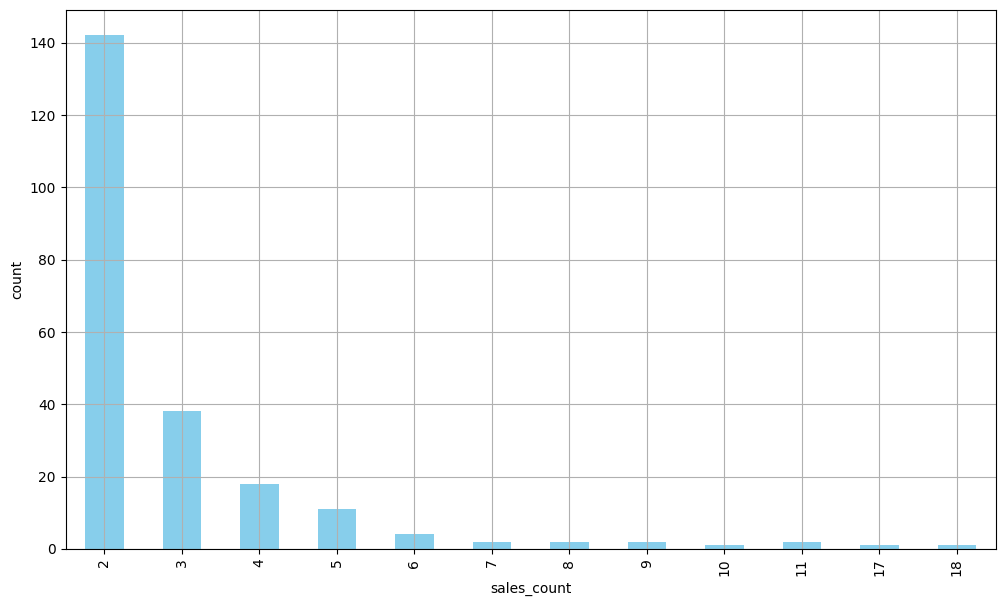

In [81]:
# We filter on invoicedate_purchase_duration greater than 0
summary_dfu3 = summary_dfu2.loc[summary_dfu2['invoicedate_purchase_duration'] >= 0]

ax = summary_dfu3.groupby('sales_count').count()['sales_avg'][:20].plot(kind='bar', color='skyblue',figsize=(12,7), grid=True)

ax.set_ylabel('count')

plt.show()

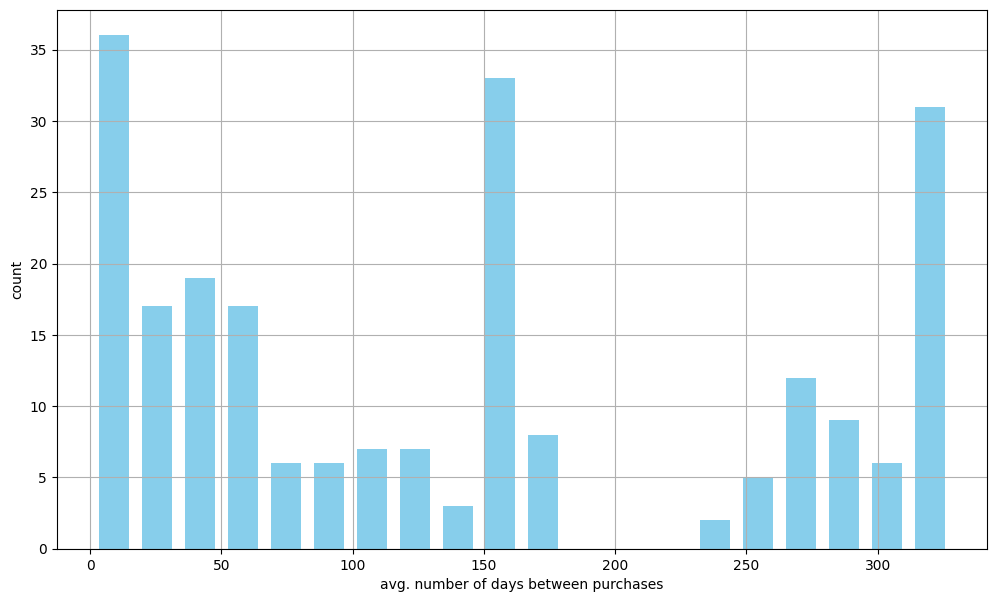

In [82]:
# Now we create a distribution for the average times between sales
ax = summary_dfu3['invoicedate_purchase_duration'].hist(bins=20, color='skyblue', rwidth=0.7, figsize=(12,7))

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

#Forecasting 4 Months

In [83]:
orders_dfu.head()

Sales         InvoiceDate
CustomerID InvoiceNo                               
12347.0    542237      364650.0 2021-01-26 14:30:00
12353.0    553900     1272700.0 2021-05-19 17:47:00
12359.0    540946     1205490.0 2021-01-12 12:43:00
           543370     1038895.0 2021-02-07 14:51:00
12365.0    544574     4585867.0 2021-02-21 13:51:00

In [85]:
# Create summary statistics in 4 month intervals for customer Sales

# Use 4M for 4 month
clv_freq = '4M'

# Groupby customer ID now, and group all invoices for 4 month cycles.
# Aggregate on sum, mean and counts
data_df = orders_dfu.reset_index().groupby(['CustomerID', pd.Grouper(key='InvoiceDate', freq=clv_freq)]).agg({
    'Sales': [sum, groupby_mean, groupby_count],})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12347.0,2021-04-30,364650.0,3.646500e+05,1
1,12353.0,2021-08-31,1272700.0,1.272700e+06,1
2,12359.0,2021-04-30,2244385.0,1.122192e+06,2
3,12365.0,2021-04-30,4585867.0,1.528622e+06,3
4,12371.0,2021-12-31,5148000.0,5.148000e+06,1


In [86]:
# Adding Recency 'M'

# Get the M
date_month_map = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))}

# Create our M Column
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12347.0,2021-04-30,364650.0,3.646500e+05,1,M_3
1,12353.0,2021-08-31,1272700.0,1.272700e+06,1,M_2
2,12359.0,2021-04-30,2244385.0,1.122192e+06,2,M_3
3,12365.0,2021-04-30,4585867.0,1.528622e+06,3,M_3
4,12371.0,2021-12-31,5148000.0,5.148000e+06,1,M_1


In [89]:
data_df['M'].unique()

array(['M_3', 'M_2', 'M_1', 'M_4'], dtype=object)

In [90]:
# Create our Features DF
features_df = pd.pivot_table(data_df.loc[data_df['M'] != 'M_1'], values=['sales_sum', 'sales_avg', 'sales_count'], columns='M', index='CustomerID')

features_df.columns = ['_'.join(col) for col in features_df.columns]

features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4
CustomerID,,,,,,,,,
12347.0,NaN,3.646500e+05,NaN,NaN,1.0,NaN,NaN,364650.0,NaN
12353.0,1272700.0,NaN,NaN,1.0,NaN,NaN,1272700.0,NaN,NaN
12359.0,NaN,1.122192e+06,NaN,NaN,2.0,NaN,NaN,2244385.0,NaN
12365.0,NaN,1.528622e+06,NaN,NaN,3.0,NaN,NaN,4585867.0,NaN
12377.0,NaN,NaN,765336.0,NaN,NaN,1.0,NaN,NaN,765336.0


In [91]:
# Create our Response DF
response_df = data_df.loc[data_df['M'] == 'M_1', ['CustomerID', 'sales_sum']]

response_df.columns = ['CustomerID', 'CLV_'+clv_freq]
response_df.head()

,CustomerID,CLV_4M
4,12371.0,5148000.0
6,12380.0,-60775.0
10,12398.0,23389938.0
12,12403.0,5858710.0
13,12407.0,4300868.0


In [92]:
# Create our Sample Set by merging features with response_df
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left'
)

sample_set_df = sample_set_df.fillna(0)
sample_set_df

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,CustomerID,CLV_4M
NaN,0.0,3.646500e+05,0.0,0.0,1.0,0.0,0.0,364650.0,0.0,12347.0,0.0
NaN,1272700.0,0.000000e+00,0.0,1.0,0.0,0.0,1272700.0,0.0,0.0,12353.0,0.0
NaN,0.0,1.122192e+06,0.0,0.0,2.0,0.0,0.0,2244385.0,0.0,12359.0,0.0
NaN,0.0,1.528622e+06,0.0,0.0,3.0,0.0,0.0,4585867.0,0.0,12365.0,0.0
NaN,0.0,0.000000e+00,765336.0,0.0,0.0,1.0,0.0,0.0,765336.0,12377.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.0,6.692400e+05,0.0,0.0,1.0,0.0,0.0,669240.0,0.0,18239.0,0.0
NaN,0.0,0.000000e+00,429000.0,0.0,0.0,1.0,0.0,0.0,429000.0,18245.0,0.0
NaN,0.0,1.458600e+05,0.0,0.0,2.0,0.0,0.0,291720.0,0.0,18257.0,0.0
NaN,6119971.0,1.773200e+05,0.0,1.0,2.0,0.0,6119971.0,354640.0,0.0,18260.0,0.0


In [93]:
sample_set_df.shape

(760, 11)